In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
roads = pd.read_csv('..//roads//roads.csv')
roads.head()

lat_     lon_  State_  Ta_mean  Ta_min  Ta_max  Tsurf_mean  Tsurf_min  \
0  68.0926  16.3644       3     14.1    14.1    14.1    1.675000       1.61   
1  68.0926  16.3645       3     14.1    14.1    14.1    1.787778       1.55   
2  68.0926  16.3646       3     14.1    14.1    14.1    2.050000       2.05   
3  68.0926  16.3647       3     14.1    14.1    14.1    1.920000       1.92   
4  68.0926  16.3648       3     14.1    14.1    14.1    1.550000       1.55   

   Tsurf_max  Water_mean  ...  Tdew_mean  Tdew_min  Tdew_max  Friction_mean  \
0       1.74    0.092000  ...        NaN       NaN       NaN           0.73   
1       1.98    0.105778  ...        NaN       NaN       NaN           0.73   
2       2.05    0.088000  ...        NaN       NaN       NaN           0.72   
3       1.92    0.108000  ...        NaN       NaN       NaN           0.72   
4       1.55    0.094000  ...        NaN       NaN       NaN           0.71   

   Friction_min  Friction_max  Date_<lambda>  Time(+01:00)_min  Direction_min  \
0          0.73          0.73     2020.12.22          12:05:56          273.7   
1          0.73          0.73     2020.12.22          12:05:47          275.5   
2          0.72          0.72     2020.12.22          12:05:46          286.1   
3          0.72          0.72     2020.12.22          12:05:45          288.3   
4          0.71          0.71     2020.12.22          12:05:44          290.0   

   Direction_max  
0          282.4  
1          285.1  
2          286.1  
3          288.3  
4          290.0  

[5 rows x 28 columns]

In [9]:
states_str = ['dry', 'moist', 'wet', 'icy', 'snowy', 'slushy']
state_encode = {i: states_str[i-1] for i in range(1, 7)}
state_encode

{1: 'dry', 2: 'moist', 3: 'wet', 4: 'icy', 5: 'snowy', 6: 'slushy'}

In [3]:
roads = roads.rename(columns = {'Date_<lambda>': 'Date', 'Time(+01:00)_min': 'Time'})

In [4]:
roads.columns

Index(['lat_', 'lon_', 'State_', 'Ta_mean', 'Ta_min', 'Ta_max', 'Tsurf_mean',
       'Tsurf_min', 'Tsurf_max', 'Water_mean', 'Water_min', 'Water_max',
       'Speed_mean', 'Speed_min', 'Speed_max', 'Height_mean', 'Height_min',
       'Height_max', 'Tdew_mean', 'Tdew_min', 'Tdew_max', 'Friction_mean',
       'Friction_min', 'Friction_max', 'Date', 'Time', 'Direction_min',
       'Direction_max'],
      dtype='object')

In [5]:
roadsnt = roads.drop(columns=['Date', 'Time'])
roadsnt

lat_     lon_  State_    Ta_mean  Ta_min  Ta_max  Tsurf_mean  \
0       68.0926  16.3644       3  14.100000    14.1    14.1    1.675000   
1       68.0926  16.3645       3  14.100000    14.1    14.1    1.787778   
2       68.0926  16.3646       3  14.100000    14.1    14.1    2.050000   
3       68.0926  16.3647       3  14.100000    14.1    14.1    1.920000   
4       68.0926  16.3648       3  14.100000    14.1    14.1    1.550000   
...         ...      ...     ...        ...     ...     ...         ...   
196128  68.5799  17.6050       6  -1.600000    -1.6    -1.6  -12.320000   
196129  68.5799  17.6053       6  -0.933333    -1.6    -0.6  -11.783333   
196130  68.5799  17.6055       6  -1.600000    -1.6    -1.6  -12.110000   
196131  68.5799  17.6056       6  -0.600000    -0.6    -0.6  -11.840000   
196132  68.5799  17.6058       6  -1.600000    -1.6    -1.6  -12.520000   

        Tsurf_min  Tsurf_max  Water_mean  ...  Height_min  Height_max  \
0            1.61       1.74    0.092000  ...        36.0        36.0   
1            1.55       1.98    0.105778  ...        36.0        37.0   
2            2.05       2.05    0.088000  ...        37.0        37.0   
3            1.92       1.92    0.108000  ...        37.0        37.0   
4            1.55       1.55    0.094000  ...        36.0        36.0   
...           ...        ...         ...  ...         ...         ...   
196128     -12.32     -12.32    0.110000  ...       196.0       196.0   
196129     -12.16     -11.52    0.124667  ...       164.0       196.0   
196130     -12.11     -12.11    0.137000  ...       196.0       196.0   
196131     -11.84     -11.84    0.113000  ...       165.0       165.0   
196132     -12.52     -12.52    0.138000  ...       197.0       197.0   

        Tdew_mean  Tdew_min  Tdew_max  Friction_mean  Friction_min  \
0             NaN       NaN       NaN       0.730000          0.73   
1             NaN       NaN       NaN       0.730000          0.73   
2             NaN       NaN       NaN       0.720000          0.72   
3             NaN       NaN       NaN       0.720000          0.72   
4             NaN       NaN       NaN       0.710000          0.71   
...           ...       ...       ...            ...           ...   
196128        NaN       NaN       NaN       0.370000          0.37   
196129        NaN       NaN       NaN       0.356667          0.35   
196130        NaN       NaN       NaN       0.370000          0.37   
196131        NaN       NaN       NaN       0.350000          0.35   
196132        NaN       NaN       NaN       0.370000          0.37   

        Friction_max  Direction_min  Direction_max  
0               0.73          273.7          282.4  
1               0.73          275.5          285.1  
2               0.72          286.1          286.1  
3               0.72          288.3          288.3  
4               0.71          290.0          290.0  
...              ...            ...            ...  
196128          0.37          268.6          268.6  
196129          0.37           96.6          275.0  
196130          0.37          284.0          284.0  
196131          0.35          105.7          105.7  
196132          0.37          291.9          291.9  

[196133 rows x 26 columns]

In [6]:
np.random.seed(42)
subsample = roadsnt.sample(n = 1000)

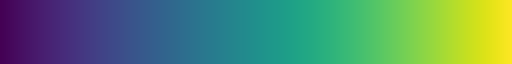

In [10]:
sns.color_palette("viridis", as_cmap=True)

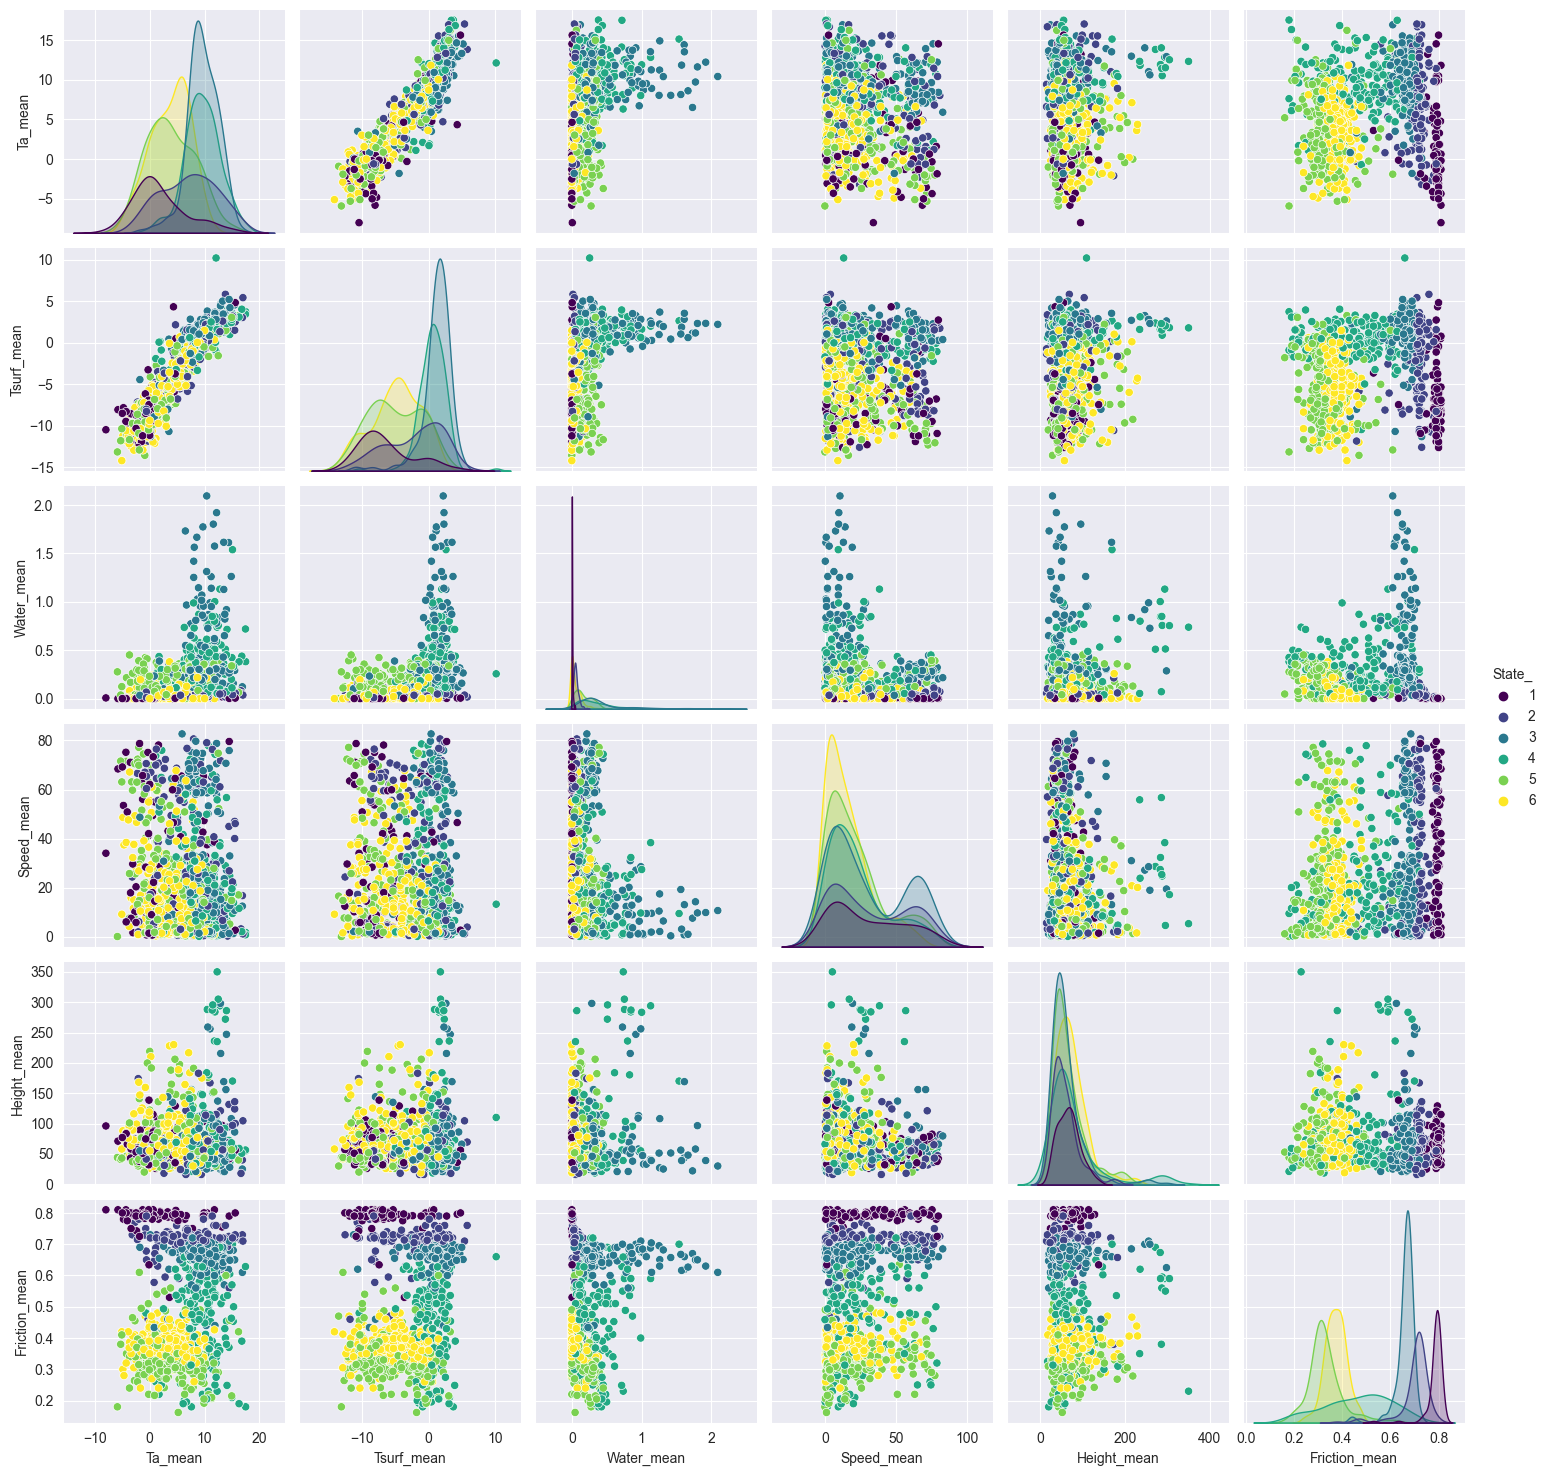

In [12]:
sns.pairplot(data = subsample[['State_', 'Ta_mean', 'Tsurf_mean', 'Water_mean', 'Speed_mean', 'Height_mean', 'Friction_mean']], hue='State_', palette='viridis')

In [58]:
from meteostat import Point, Hourly, Stations
from datetime import datetime

In [54]:
stations = Stations()
stations = stations.nearby(68.48, 17.38)
station = stations.fetch(1)
station

name country region    wmo  icao  latitude  longitude  \
id                                                                       
01194  Narvik Airport      NO     NO  01194  ENNK   68.4667       17.5   

       elevation     timezone hourly_start hourly_end daily_start  daily_end  \
id                                                                             
01194       17.0  Europe/Oslo   2001-07-06 2017-04-03  2011-09-29 2017-04-02   

      monthly_start monthly_end     distance  
id                                            
01194    2011-01-01  2017-01-01  5114.619464

In [48]:
p = Point(68.4667, 17.5)

In [49]:
datetime.datetime(*[int(x) for x in roads['Date'][0].split('.')])

datetime.datetime(2020, 12, 22, 0, 0)

In [50]:
h = Hourly(p, start=datetime.datetime(2020, 12, 22), end=datetime.datetime(2021, 2, 19))

In [51]:
h.fetch()

temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2020-12-22 00:00:00   3.4  -1.2  72.0   NaN   NaN  197.0  16.7  24.1  1000.0   
2020-12-22 01:00:00   2.8  -1.6  73.0   NaN   NaN  202.0  14.8  25.9  1000.0   
2020-12-22 02:00:00   2.3  -1.7  75.0   NaN   NaN  202.0  13.0  24.1   999.5   
2020-12-22 03:00:00   1.6  -2.2  76.0   NaN   NaN  200.0  13.0  20.4   999.5   
2020-12-22 04:00:00   2.0  -2.3  73.0   NaN   NaN  199.0  14.8  27.8   999.5   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2021-02-18 20:00:00  -9.5 -12.8  77.0   0.0   NaN  193.0  11.1  22.2  1011.5   
2021-02-18 21:00:00  -9.7 -13.0  77.0   0.0   NaN  191.0  13.0  24.1  1011.8   
2021-02-18 22:00:00  -6.9 -11.8  68.0   0.0   NaN  183.0  13.0  27.8  1011.2   
2021-02-18 23:00:00  -7.3 -12.4  67.0   0.0   NaN  187.0  13.0  27.8  1010.8   
2021-02-19 00:00:00  -7.7 -12.6  68.0   0.0   NaN  199.0  14.8  27.8  1010.4   

                     tsun  coco  
time                             
2020-12-22 00:00:00   NaN   2.0  
2020-12-22 01:00:00   NaN   2.0  
2020-12-22 02:00:00   NaN   2.0  
2020-12-22 03:00:00   NaN   1.0  
2020-12-22 04:00:00   NaN   2.0  
...                   ...   ...  
2021-02-18 20:00:00   NaN   1.0  
2021-02-18 21:00:00   NaN   1.0  
2021-02-18 22:00:00   NaN   1.0  
2021-02-18 23:00:00   NaN   1.0  
2021-02-19 00:00:00   NaN   1.0  

[1417 rows x 11 columns]

In [59]:
from wwo_hist import retrieve_hist_data

In [60]:
frequency=1
start_date = '22-DEC-2020'
end_date = '19-FEB-2021'
api_key = 'a0b1dba6b7124a6c8d9132524222310'
location_list = ['narvik']
wwo_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for narvik


Currently retrieving data for narvik: from 2020-12-22 to 2020-12-31


Time elapsed (hh:mm:ss.ms) 0:00:00.522382
Currently retrieving data for narvik: from 2021-01-01 to 2021-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.381269
Currently retrieving data for narvik: from 2021-02-01 to 2021-02-19
Time elapsed (hh:mm:ss.ms) 0:00:02.095068


export narvik completed!




In [63]:
wwo_data = pd.read_csv('narvik.csv')

wwo_data.head()

date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
0  2020-12-22 00:00:00         2        -1           0.0      0.0        1   
1  2020-12-22 01:00:00         2        -1           0.0      0.0        1   
2  2020-12-22 02:00:00         2        -1           0.0      0.0        1   
3  2020-12-22 03:00:00         2        -1           0.0      0.0        1   
4  2020-12-22 04:00:00         2        -1           0.0      0.0        1   

   moon_illumination  moonrise   moonset   sunrise  ... WindGustKmph  \
0                 50  01:39 PM  12:02 AM  12:00 AM  ...           17   
1                 50  01:39 PM  12:02 AM  12:00 AM  ...           19   
2                 50  01:39 PM  12:02 AM  12:00 AM  ...           20   
3                 50  01:39 PM  12:02 AM  12:00 AM  ...           22   
4                 50  01:39 PM  12:02 AM  12:00 AM  ...           21   

   cloudcover  humidity  precipMM  pressure  tempC  visibility  winddirDegree  \
0          44        83       0.1      1000      0           7            133   
1          43        79       0.0      1000      0           8            126   
2          43        76       0.0      1000      1           9            119   
3          43        73       0.0       999      2          10            111   
4          46        72       0.0       999      2          10            117   

   windspeedKmph  location  
0             11    narvik  
1             12    narvik  
2             12    narvik  
3             12    narvik  
4             12    narvik  

[5 rows x 25 columns]

In [ ]:
#wwo_data['date_time'] = wwo_data['date_time'].apply(lambda str:  str.split('-'))

In [65]:
wwo_data.dtypes

date_time             object
maxtempC               int64
mintempC               int64
totalSnow_cm         float64
sunHour              float64
uvIndex                int64
moon_illumination      int64
moonrise              object
moonset               object
sunrise               object
sunset                object
DewPointC              int64
FeelsLikeC             int64
HeatIndexC             int64
WindChillC             int64
WindGustKmph           int64
cloudcover             int64
humidity               int64
precipMM             float64
pressure               int64
tempC                  int64
visibility             int64
winddirDegree          int64
windspeedKmph          int64
location              object
dtype: object

In [ ]:
def getDateTime(row):
    return '-'.join(row['Date'].split('.')) + " " + row['Time'].split(':')[0] + ":00:00"


roads['FullDate'] = roads.apply(lambda row: getDateTime(row), axis=1)

In [68]:
roads.head()

lat_     lon_  State_  Ta_mean  Ta_min  Ta_max  Tsurf_mean  Tsurf_min  \
0  68.0926  16.3644       3     14.1    14.1    14.1    1.675000       1.61   
1  68.0926  16.3645       3     14.1    14.1    14.1    1.787778       1.55   
2  68.0926  16.3646       3     14.1    14.1    14.1    2.050000       2.05   
3  68.0926  16.3647       3     14.1    14.1    14.1    1.920000       1.92   
4  68.0926  16.3648       3     14.1    14.1    14.1    1.550000       1.55   

   Tsurf_max  Water_mean  ...  Tdew_min  Tdew_max  Friction_mean  \
0       1.74    0.092000  ...       NaN       NaN           0.73   
1       1.98    0.105778  ...       NaN       NaN           0.73   
2       2.05    0.088000  ...       NaN       NaN           0.72   
3       1.92    0.108000  ...       NaN       NaN           0.72   
4       1.55    0.094000  ...       NaN       NaN           0.71   

   Friction_min  Friction_max        Date      Time  Direction_min  \
0          0.73          0.73  2020.12.22  12:05:56          273.7   
1          0.73          0.73  2020.12.22  12:05:47          275.5   
2          0.72          0.72  2020.12.22  12:05:46          286.1   
3          0.72          0.72  2020.12.22  12:05:45          288.3   
4          0.71          0.71  2020.12.22  12:05:44          290.0   

   Direction_max             FullDate  
0          282.4  2020-12-22 12:00:00  
1          285.1  2020-12-22 12:00:00  
2          286.1  2020-12-22 12:00:00  
3          288.3  2020-12-22 12:00:00  
4          290.0  2020-12-22 12:00:00  

[5 rows x 29 columns]

In [69]:
extended_data = pd.merge(left = roads, right = wwo_data, left_on='FullDate', right_on='date_time', how='left')
extended_data.head()

lat_     lon_  State_  Ta_mean  Ta_min  Ta_max  Tsurf_mean  Tsurf_min  \
0  68.0926  16.3644       3     14.1    14.1    14.1    1.675000       1.61   
1  68.0926  16.3645       3     14.1    14.1    14.1    1.787778       1.55   
2  68.0926  16.3646       3     14.1    14.1    14.1    2.050000       2.05   
3  68.0926  16.3647       3     14.1    14.1    14.1    1.920000       1.92   
4  68.0926  16.3648       3     14.1    14.1    14.1    1.550000       1.55   

   Tsurf_max  Water_mean  ...  WindGustKmph  cloudcover  humidity  precipMM  \
0       1.74    0.092000  ...          17.0        73.0      67.0       0.0   
1       1.98    0.105778  ...          17.0        73.0      67.0       0.0   
2       2.05    0.088000  ...          17.0        73.0      67.0       0.0   
3       1.92    0.108000  ...          17.0        73.0      67.0       0.0   
4       1.55    0.094000  ...          17.0        73.0      67.0       0.0   

   pressure  tempC  visibility  winddirDegree  windspeedKmph  location  
0     999.0    2.0        10.0          110.0           10.0    narvik  
1     999.0    2.0        10.0          110.0           10.0    narvik  
2     999.0    2.0        10.0          110.0           10.0    narvik  
3     999.0    2.0        10.0          110.0           10.0    narvik  
4     999.0    2.0        10.0          110.0           10.0    narvik  

[5 rows x 54 columns]

In [72]:
extended_data_dropped = extended_data.drop(columns=['date_time', 'FullDate', 'location'])
extended_data_dropped.shape

(196133, 51)

In [73]:
extended_data.to_csv('fulldata.csv')

In [74]:
np.random.seed(42)
subsample1 = extended_data_dropped.sample(n = 1000)

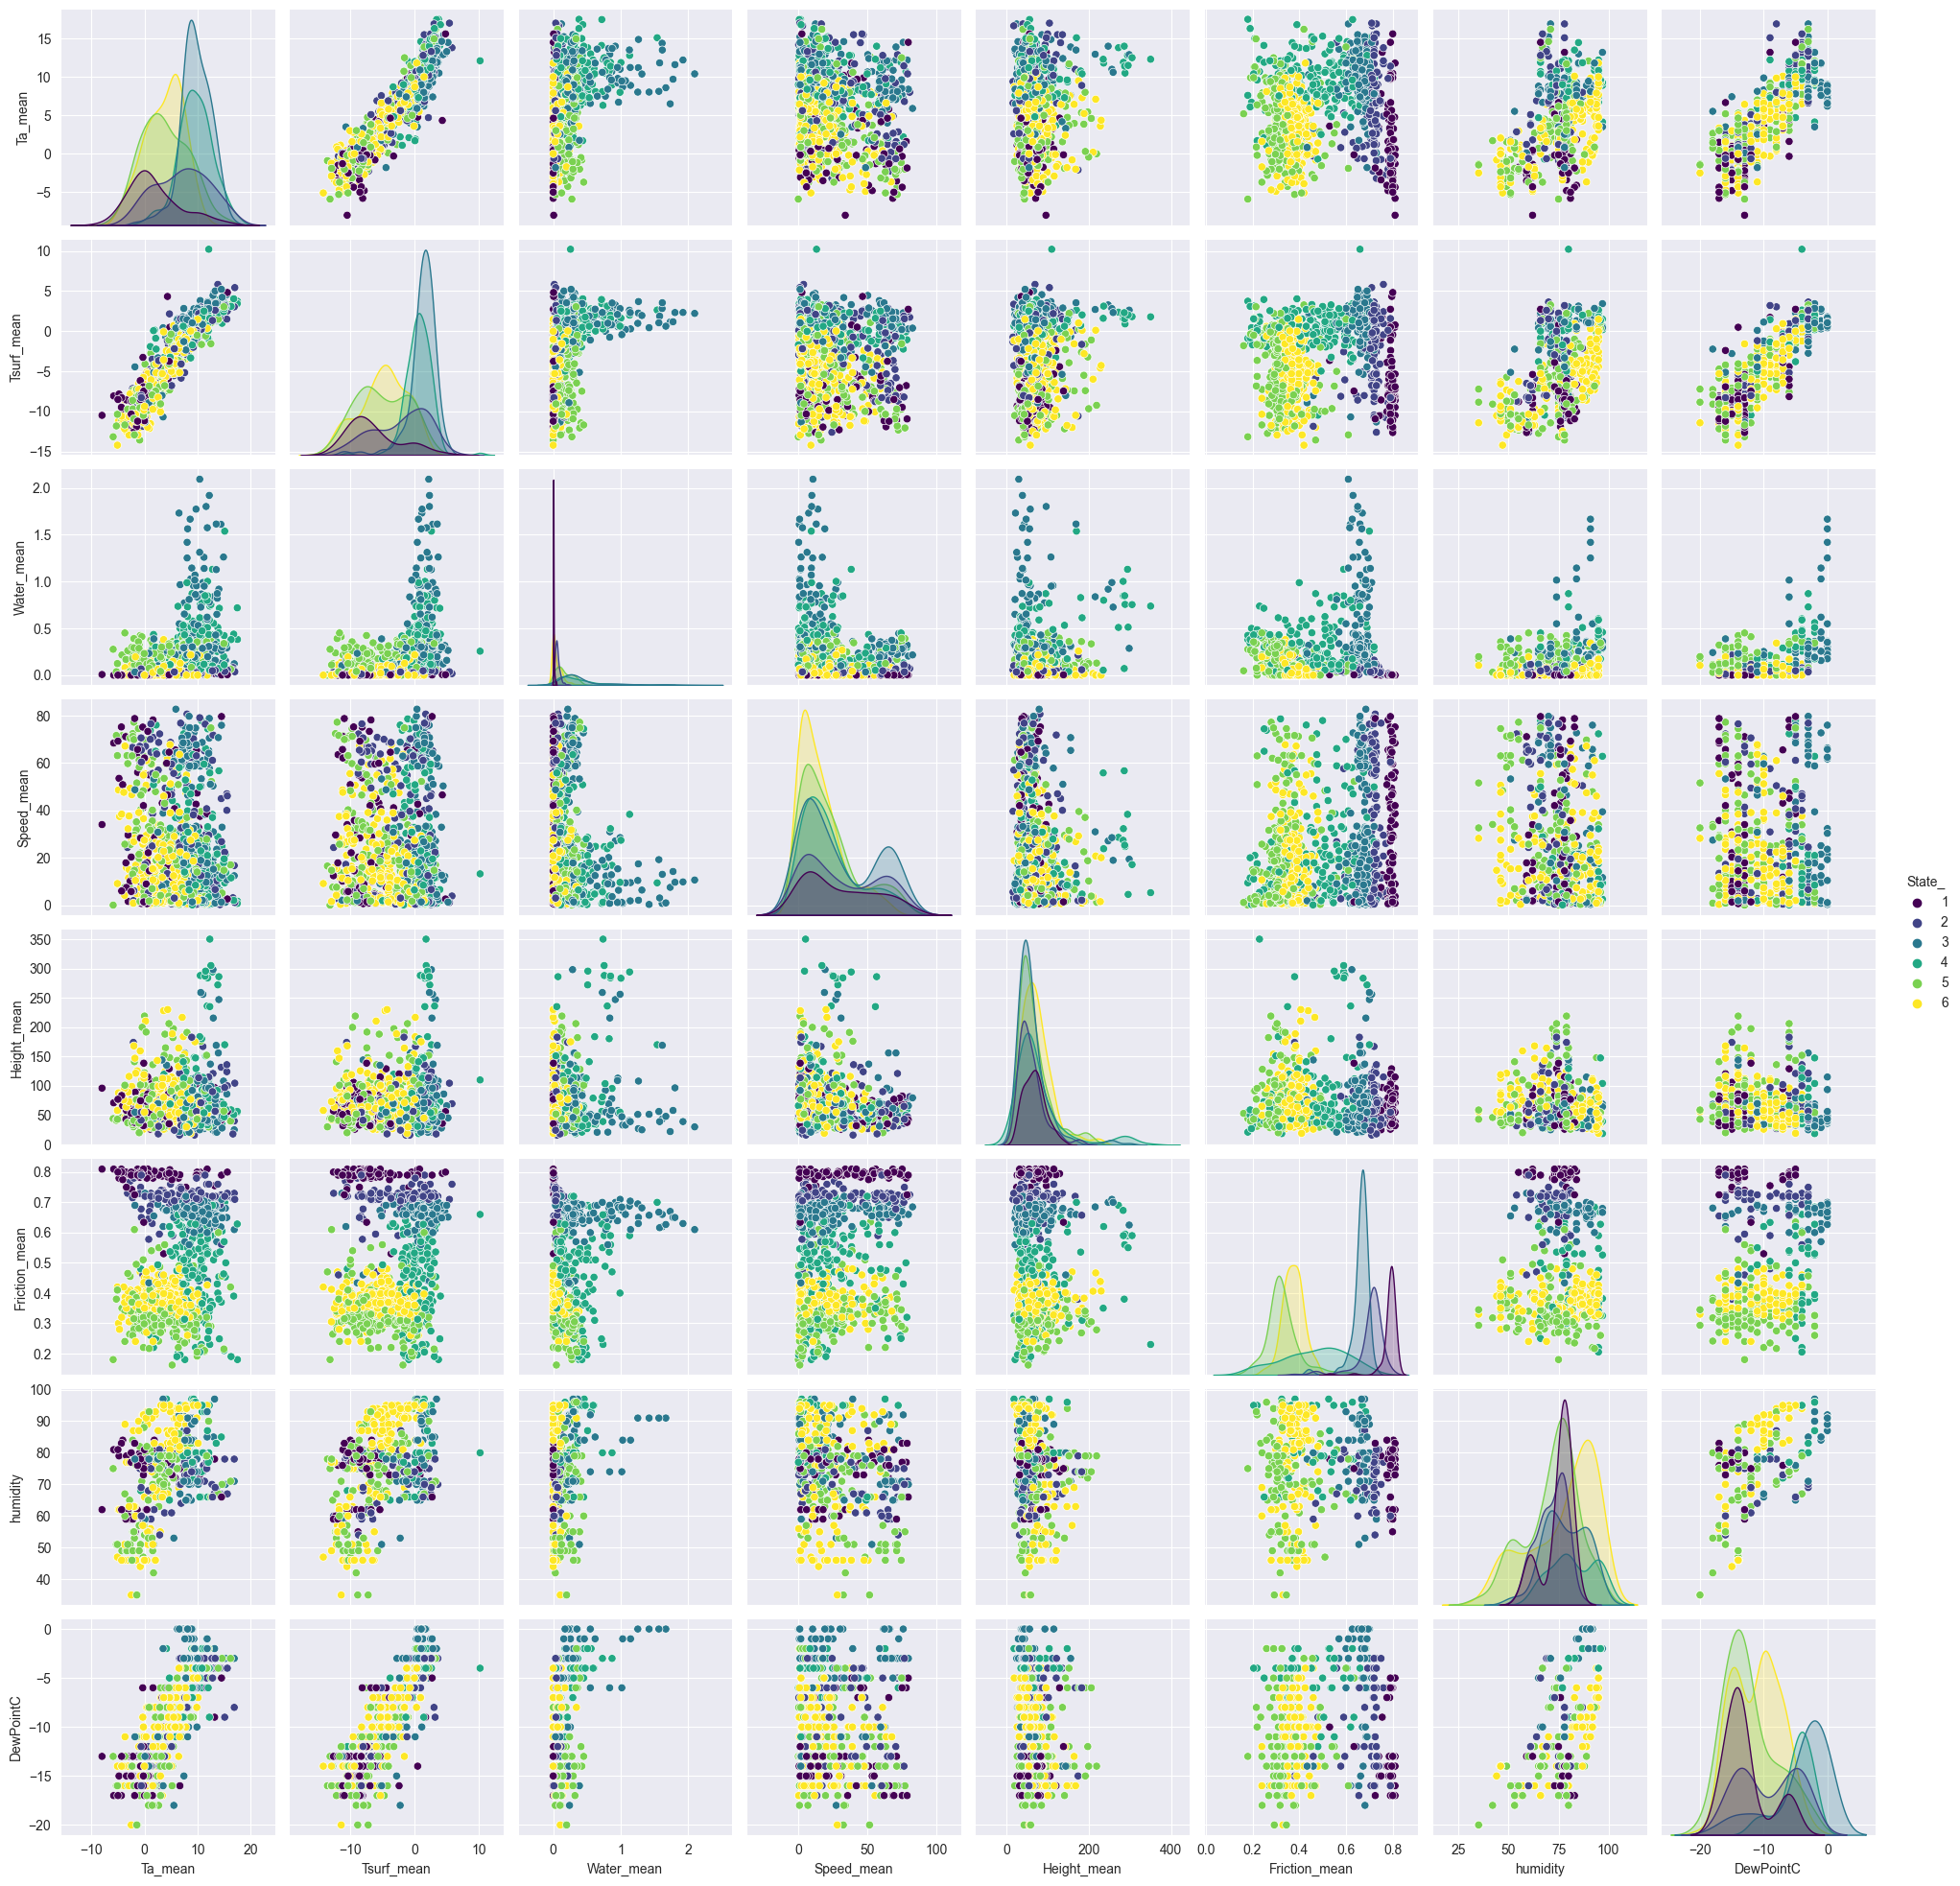

In [75]:
sns.pairplot(data = subsample1[['State_', 'Ta_mean', 'Tsurf_mean', 'Water_mean', 'Speed_mean', 'Height_mean', 'Friction_mean', 'humidity', 'DewPointC']], hue='State_', palette='viridis')